# GRIP: THE SPARKS FOUNDATION

# Data Science and Business Analytics Internship

# Task 2 : Prediction using Unsupervised Machine Learning

# Submitted by Mayur Asnani

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Loading Dataset

In [2]:
df=pd.read_csv('/Users/mayurasnani/Downloads/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.drop(columns=['Id'],inplace=True)

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
X=df.iloc[:,[0,1,2,3]].values

# Creating a dendogram to find optimum number of clusters

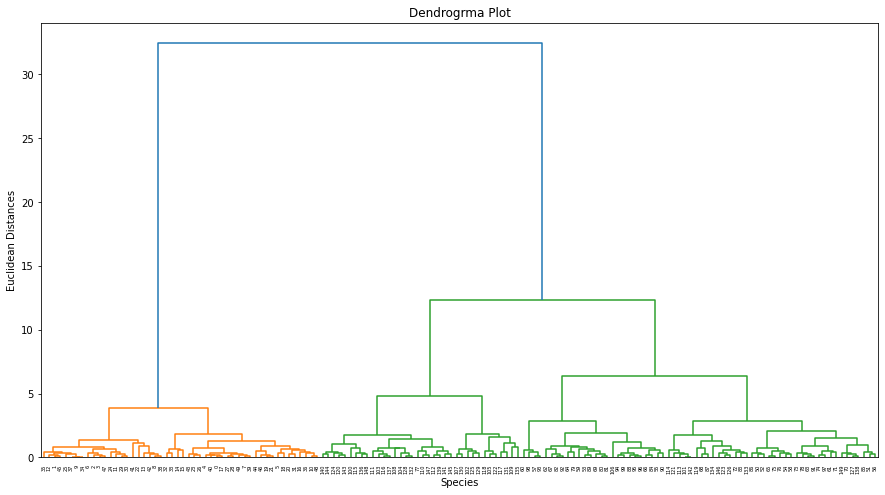

In [38]:
import scipy.cluster.hierarchy as hc 

plt.figure(figsize=(15,8))
dendro = hc.dendrogram(hc.linkage(X, method="ward"))  
plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances") 
plt.xlabel('Species')
plt.show()  

# According to the above dendogram we need 3 clusters i.e k=3 as there are 3 vertical lines parallel to the longest vertical line

### Implementing k means

In [8]:
from sklearn.cluster import KMeans

In [9]:
km=KMeans(n_clusters=3,init='k-means++')

In [10]:
km.fit(X)

KMeans(n_clusters=3)

In [11]:
centers=km.cluster_centers_
print(centers)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


In [12]:
labels=km.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [13]:
y_pred=km.fit_predict(X)

In [14]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

### Representing clusters

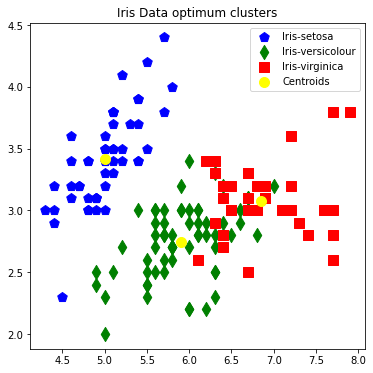

In [56]:
plt.figure(figsize=(6,6))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa',marker='p')  
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour',marker='d')  
plt.scatter(X[y_pred== 2, 0], X[y_pred == 2, 1], s = 100, c = 'red', label = 'Iris-virginica',marker='s')  
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')
plt.title('Iris Data optimum clusters')  
plt.legend()  
plt.show()

# Calculating the Accuracy and Confusion Matrix

In [27]:
from sklearn import metrics as sm
from sklearn.preprocessing import LabelEncoder

In [21]:
y_actual=df.iloc[:,-1]
print(y_actual.shape)
print(y_pred.shape)

(150,)
(150,)


In [28]:
le=LabelEncoder()
y_actual=le.fit_transform(y_actual)

In [30]:
print(y_actual.shape)

(150,)


In [32]:
sm.accuracy_score(y_pred,y_actual)

0.8933333333333333

In [33]:
sm.confusion_matrix(y_pred,y_actual)

array([[50,  0,  0],
       [ 0, 48, 14],
       [ 0,  2, 36]])

# Conclusion:

### I was able to successfully carry-out prediction using Unsupervised Machine Learning task in predicting optimum number of clusters , represent them visually and was able to evaluate the model's clustering accuracy score.